In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb


C:\Users\jkash\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jkash\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\jkash\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
X_input=np.array([[1],[2],[3],[4],[5]])
Y_target=np.array([[1],[3],[2],[3],[5]])

In [3]:
data=pd.DataFrame({"X":X_input.tolist(),"Y":Y_target.tolist()})
data

,X,Y
0,[1],[1]
1,[2],[3]
2,[3],[2]
3,[4],[3]
4,[5],[5]


In [4]:
from sklearn.linear_model import LinearRegression 

In [5]:
trainer=LinearRegression()

In [6]:
learner=trainer.fit(X_input,Y_target)

In [7]:
learner.predict([[1]])

array([[1.2]])

In [8]:
learner.coef_ #coef_=m

array([[0.8]])

In [9]:
learner.intercept_ # intercept_=c

array([0.4])

In [10]:
Yp=learner.predict(X_input)

In [11]:
Yp=Yp[:,0].tolist()
Yp

[1.1999999999999997, 1.9999999999999998, 2.8, 3.6, 4.4]

In [12]:
Ya=Y_target[:,0].tolist()

In [13]:
YavsYp=pd.DataFrame({"Ya":Ya,"Yp":Yp})

In [14]:
YavsYp["Error"]=np.sqrt(np.square(YavsYp["Ya"]-YavsYp["Yp"]))

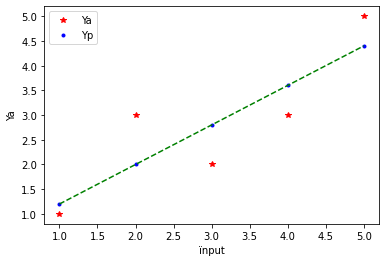

In [15]:
plt.plot(X_input[:,0].tolist(),Ya,'*r')
plt.plot(X_input[:,0].tolist(),Yp,'.b')
plt.plot(X_input[:,0].tolist(),Yp,'--g')

plt.xlabel("ïnput")
plt.ylabel("Ya")
plt.legend(["Ya","Yp"])
plt.show()

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
mse_lr=mean_squared_error(Ya,Yp)
np.sqrt(mse_lr)

0.6928203230275508

# Insurance dataset

In [18]:
data=pd.read_csv(r'D:\---janvi---\DataSets-master\linearRegression_insurance-main\insurance.csv')

In [19]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [20]:
#data.info

In [21]:
#data.describe()

In [22]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


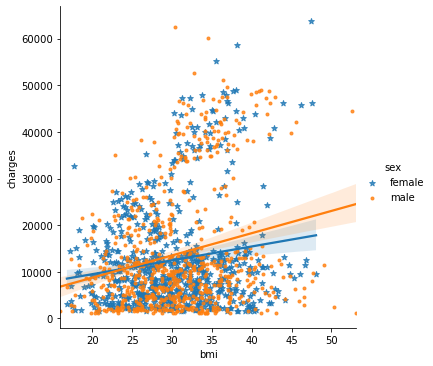

In [26]:
plt.subplot
sb.lmplot(x='bmi',y='charges',data=data,hue='sex',markers=['*','.'])
plt.show()

In [ ]:
#separating feature and target
X_feature=data.iloc[:,0:6]
y_target=data.iloc[:,6]

In [ ]:
#X_feature.head()

In [ ]:
#y_target

In [ ]:
encoded_data=pd.get_dummies(X_feature)
encoded_data

In [ ]:
#encoded_data.shape

In [ ]:
#spliting training and testing data
from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest=train_test_split(encoded_data,y_target,test_size=.30,random_state=101)
Xtrain.head()

In [ ]:
#training
trainers=LinearRegression()
learner=trainers.fit(Xtrain,Ytrain)

In [ ]:
#testing
Yp=learner.predict(Xtest)
Ya=Ytest

In [ ]:
m=learner.coef_

In [ ]:
c=learner.intercept_

In [ ]:
error=np.sqrt(mean_squared_error(Ya,Yp))
print(error)